<a href="https://colab.research.google.com/github/lahin2/Abelian-and-Non-Abelian-Card-Randomness-Simulator/blob/main/Non-Abelian%20and%20Abelian%20Card%20Randomness%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Variation Distance (min ≈ 0):
| Shuffles | Riffle | Overhand | Smash | Card Interleave | Card Chunk | Card Scramble |
| 1 | 0.92 | 0.98 | 0.36 | 0.61 | 0.92 | 0.86 |
| 2 | 0.55 | 0.85 | 0.35 | 0.37 | 0.54 | 0.57 |
| 3 | 0.41 | 0.75 | 0.33 | 0.35 | 0.40 | 0.41 |
| 4 | 0.37 | 0.68 | 0.35 | 0.35 | 0.36 | 0.38 |
| 5 | 0.35 | 0.58 | 0.35 | 0.34 | 0.35 | 0.36 |
| 6 | 0.36 | 0.54 | 0.35 | 0.35 | 0.34 | 0.34 |
| 7 | 0.36 | 0.49 | 0.35 | 0.36 | 0.34 | 0.34 |
| 8 | 0.35 | 0.45 | 0.36 | 0.35 | 0.35 | 0.33 |

Top-Card Entropy (max ≈ 2.58):
| Shuffles | Riffle | Overhand | Smash | Card Interleave | Card Chunk | Card Scramble |
| 1 | 1.98 | 2.17 | 2.58 | 2.52 | 2.50 | 2.23 |
| 2 | 2.45 | 2.45 | 2.58 | 2.58 | 2.58 | 2.55 |
| 3 | 2.55 | 2.53 | 2.58 | 2.58 | 2.58 | 2.58 |
| 4 | 2.57 | 2.56 | 2.58 | 2.58 | 2.58 | 2.58 |
| 5 | 2.58 | 2.57 | 2.58 | 2.58 | 2.58 | 2.58 |
| 6 | 2.58 | 2.58 | 2.58 | 2.58 | 2.58 | 2.58 |
| 7 | 2.58 | 2.58 | 2.58 | 2.58 | 2.58 | 2.58 |
| 8 | 2.58 | 2.57 | 2.58 | 2.58 | 2.

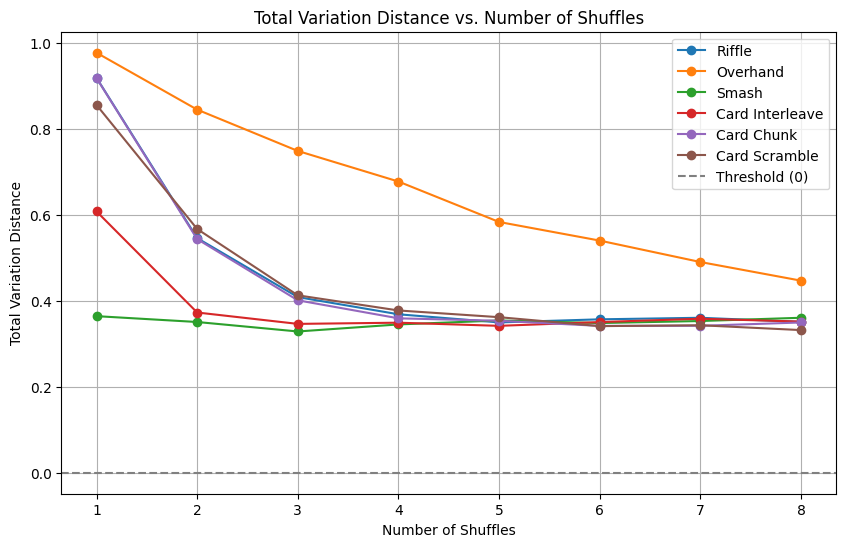

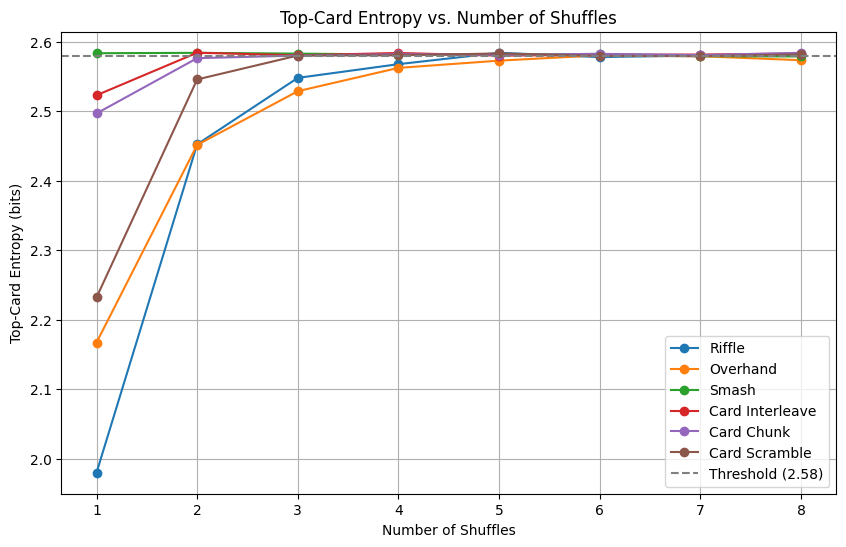

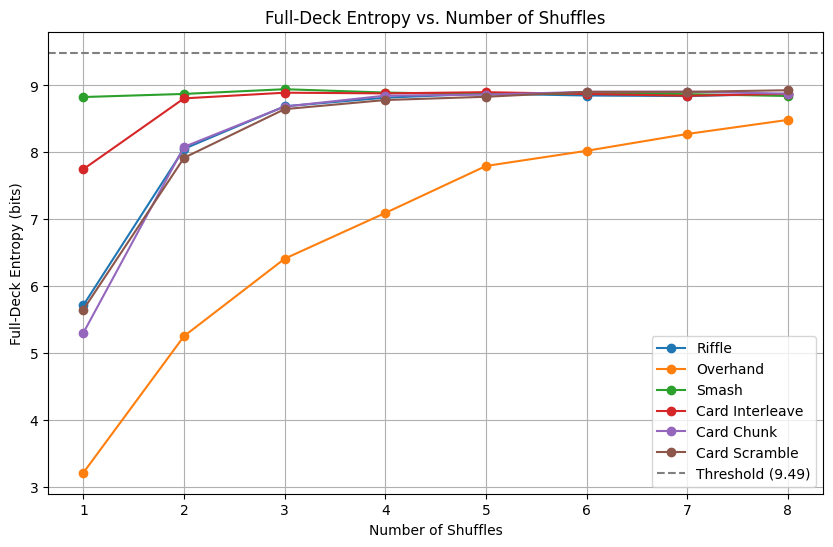

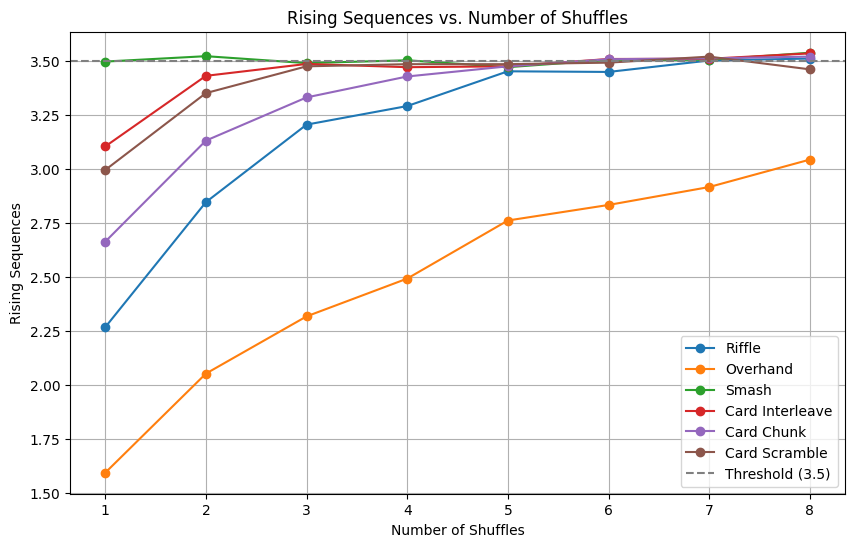

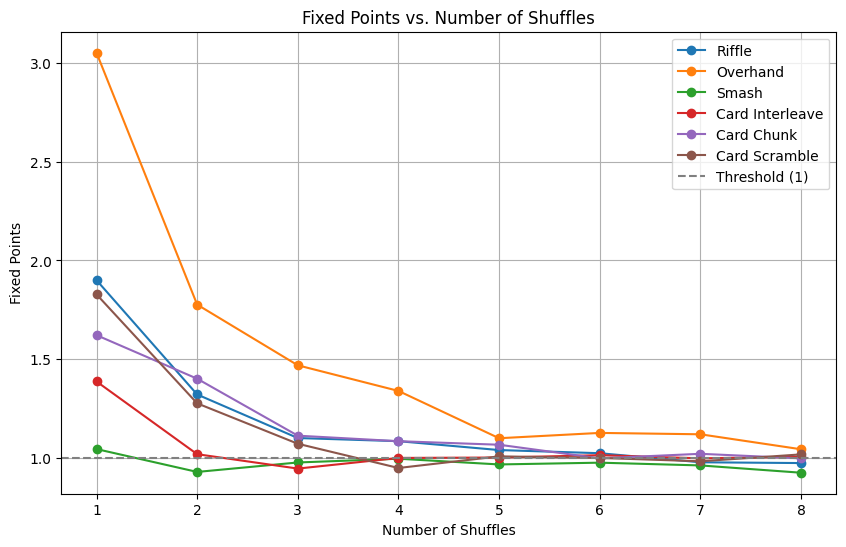

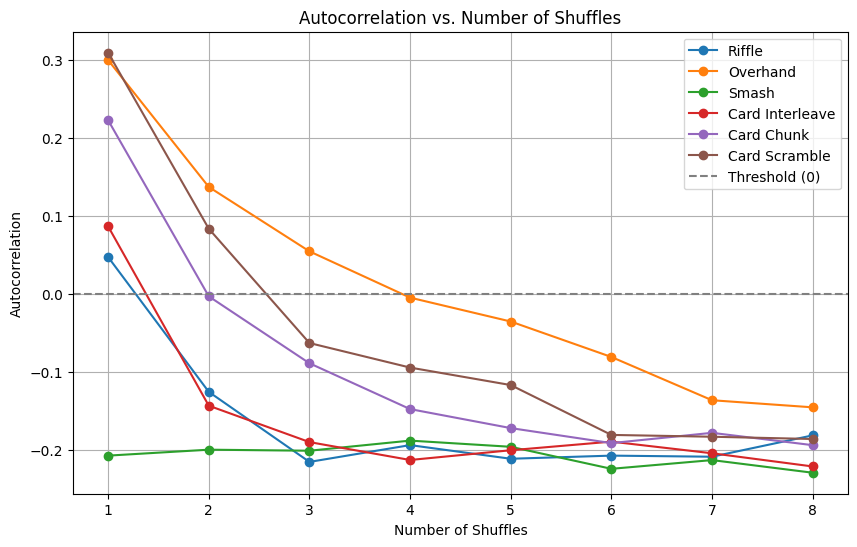

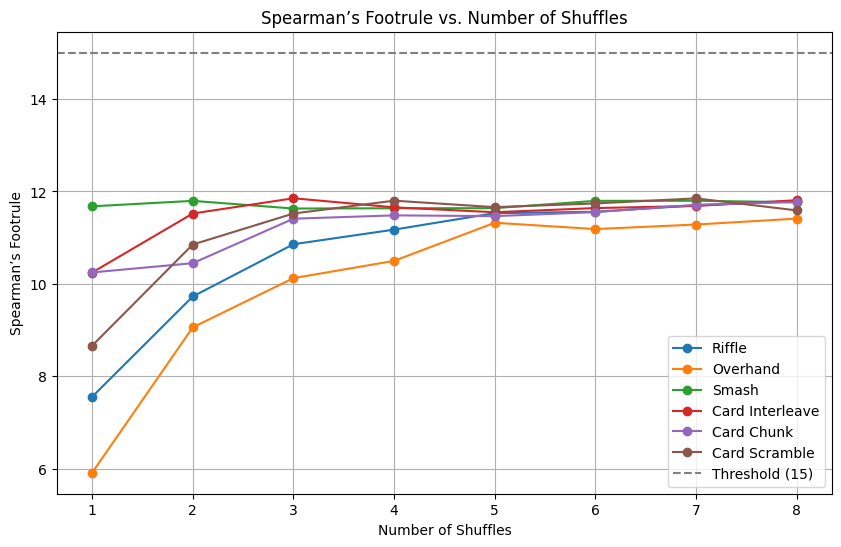


Plots displayed inline and saved as '[metric]_plot.png' (e.g., 'tvd_plot.png'). Download from Colab's file system.


In [ ]:
import numpy as np
from itertools import permutations
import math
import matplotlib.pyplot as plt

# Ensure Matplotlib is installed
try:
    import matplotlib
except ImportError:
    !pip install matplotlib
    import matplotlib

# Initialize deck and metrics
n = 6  # 6-card deck
all_perms = list(permutations(range(1, n + 1)))
num_perms = len(all_perms)  # 6! = 720
num_trials = 1000
max_shuffles = 8
initial_deck = list(range(1, n + 1))  # [1, 2, 3, 4, 5, 6]

# Validation function
def is_valid_permutation(deck):
    return sorted(deck) == list(range(1, n + 1))

# Shuffle functions with validation
def riffle(deck):
    deck = list(deck)
    cut = np.random.binomial(len(deck), 0.5)
    left, right = deck[:cut], deck[cut:]
    result = []
    while left or right:
        if left and (not right or np.random.random() < len(left) / (len(left) + len(right))):
            result.append(left.pop(0))
        else:
            result.append(right.pop(0))
    if not is_valid_permutation(result):
        raise ValueError(f"Invalid riffle permutation: {result}")
    return tuple(result)

def overhand(deck):
    deck = list(deck)
    chunk_size = np.random.randint(1, len(deck) + 1)
    chunk_start = np.random.randint(0, len(deck) - chunk_size + 1)
    chunk = deck[chunk_start:chunk_start + chunk_size]
    result = chunk + deck[:chunk_start] + deck[chunk_start + chunk_size:]
    if not is_valid_permutation(result):
        raise ValueError(f"Invalid overhand permutation: {result}")
    return tuple(result)

def smash(deck):
    deck = list(deck)
    np.random.shuffle(deck)
    if not is_valid_permutation(deck):
        raise ValueError(f"Invalid smash permutation: {deck}")
    return tuple(deck)

def card_triggered_interleave(deck):
    deck = list(deck)
    cut = np.random.binomial(len(deck), 0.5)
    left, right = deck[:cut], deck[cut:]
    num_ops = np.random.randint(1, 3)
    for _ in range(num_ops):
        card = np.random.randint(1, n + 1)
        if card == 1 and len(left) >= 2:
            left[0], left[1] = left[1], left[0]
        elif card == 2 and len(right) >= 2:
            right[0], right[1] = right[1], right[0]
        elif card == 3 and left:
            left = left[1:] + [left[0]]
        elif card == 4 and right:
            right = right[1:] + [right[0]]
        elif card == 5 and left:
            left = left[::-1]
        elif card == 6 and right:
            right = right[::-1]
    result = []
    while left or right:
        if left and (not right or np.random.random() < len(left) / (len(left) + len(right))):
            result.append(left.pop(0))
        else:
            result.append(right.pop(0))
    if not is_valid_permutation(result):
        raise ValueError(f"Invalid card_triggered_interleave permutation: {result}")
    return tuple(result)

def card_triggered_chunk(deck):
    deck = list(deck)
    chunk_size = np.random.randint(2, 4)
    chunk_start = np.random.randint(0, len(deck) - chunk_size + 1)
    chunk = deck[chunk_start:chunk_start + chunk_size]
    num_ops = np.random.randint(1, 3)
    for _ in range(num_ops):
        card = np.random.randint(1, n + 1)
        if card == 1 and len(chunk) >= 2:
            chunk[0], chunk[1] = chunk[1], chunk[0]
        elif card == 2 and len(chunk) >= 3:
            chunk[-2], chunk[-1] = chunk[-1], chunk[-2]
        elif card == 3:
            chunk = chunk[1:] + [chunk[0]]
        elif card == 4:
            chunk = chunk[-1:] + chunk[:-1]
        elif card == 5:
            chunk = chunk[::-1]
        elif card == 6:
            # Simplified: rotate entire deck instead of swapping chunks
            deck = deck[1:] + [deck[0]]
            chunk = deck[chunk_start:chunk_start + chunk_size]
    result = chunk + deck[:chunk_start] + deck[chunk_start + chunk_size:]
    if not is_valid_permutation(result):
        raise ValueError(f"Invalid card_triggered_chunk permutation: {result}")
    return tuple(result)

def card_triggered_scramble(deck):
    deck = list(deck)
    num_ops = np.random.randint(1, 4)
    for _ in range(num_ops):
        card = np.random.randint(1, n + 1)
        if card == 1 and len(deck) >= 2:
            deck[0], deck[1] = deck[1], deck[0]
        elif card == 2 and len(deck) >= 4:
            deck[2], deck[3] = deck[3], deck[2]
        elif card == 3 and len(deck) >= 3:
            deck[:3] = deck[1:3] + [deck[0]]
        elif card == 4 and len(deck) >= 3:
            deck[-3:] = [deck[-1]] + deck[-3:-1]
        elif card == 5:
            deck = deck[1:] + [deck[0]]
        elif card == 6:
            deck = deck[::-1]
    if not is_valid_permutation(deck):
        raise ValueError(f"Invalid card_triggered_scramble permutation: {deck}")
    return tuple(deck)

# Metrics
def total_variation_distance(dist):
    uniform_prob = 1 / num_perms
    return 0.5 * sum(abs(dist.get(perm, 0) - uniform_prob) for perm in all_perms)

def top_card_entropy(perms):
    top_card_counts = {i: 0 for i in range(1, n + 1)}
    for perm in perms:
        top_card_counts[perm[0]] += 1
    probs = [count / len(perms) for count in top_card_counts.values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def full_deck_entropy(dist):
    return -sum(p * math.log2(p) for p in dist.values() if p > 0)

def rising_sequences_avg(perms):
    rs_sum = 0
    for perm in perms:
        rs = 1  # Start with 1 sequence
        for i in range(len(perm) - 1):
            if perm[i] > perm[i + 1]:
                rs += 1
        rs_sum += rs
    return rs_sum / len(perms)

def fixed_points_avg(perms):
    fp_sum = 0
    for perm in perms:
        fp_sum += sum(1 for i, j in zip(initial_deck, perm) if i == j)
    return fp_sum / len(perms)

def autocorrelation_avg(perms):
    autocorr_sum = 0
    for perm in perms:
        if not is_valid_permutation(perm):
            raise ValueError(f"Invalid permutation in autocorrelation: {perm}")
        pos = {card: i + 1 for i, card in enumerate(perm)}
        x = [pos[i] for i in initial_deck]  # Positions of cards 1, 2, ..., 6
        mean_x = np.mean(x)
        var_x = np.var(x)
        if var_x == 0:
            autocorr_sum += 0
            continue
        autocorr = 0
        for i in range(n - 1):
            autocorr += (x[i] - mean_x) * (x[i + 1] - mean_x)
        autocorr /= (n - 1) * var_x if var_x > 0 else 1
        autocorr_sum += autocorr
    return autocorr_sum / len(perms)

def spearmans_footrule_avg(perms):
    sf_sum = 0
    for perm in perms:
        if not is_valid_permutation(perm):
            raise ValueError(f"Invalid permutation in spearmans: {perm}")
        pos_perm = {card: i + 1 for i, card in enumerate(perm)}
        pos_initial = {card: i + 1 for i, card in enumerate(initial_deck)}
        sf_sum += sum(abs(pos_initial[card] - pos_perm[card]) for card in initial_deck)
    return sf_sum / len(perms)

# Simulate shuffles
shuffle_methods = {
    'Riffle': riffle,
    'Overhand': overhand,
    'Smash': smash,
    'Card Interleave': card_triggered_interleave,
    'Card Chunk': card_triggered_chunk,
    'Card Scramble': card_triggered_scramble
}

results = {method: {
    'tvd': [], 'top_card_entropy': [], 'full_deck_entropy': [],
    'rising_sequences': [], 'fixed_points': [],
    'autocorrelation': [], 'spearmans': []
} for method in shuffle_methods}

for method_name, shuffle_func in shuffle_methods.items():
    for k in range(1, max_shuffles + 1):
        perm_counts = {}
        final_perms = []
        for _ in range(num_trials):
            perm = tuple(range(1, n + 1))
            for _ in range(k):
                try:
                    perm = shuffle_func(perm)
                except ValueError as e:
                    print(f"Error in {method_name} shuffle: {e}")
                    perm = tuple(range(1, n + 1))  # Fallback to initial deck
            perm_counts[perm] = perm_counts.get(perm, 0) + 1
            final_perms.append(perm)

        dist = {perm: count / num_trials for perm, count in perm_counts.items()}
        results[method_name]['tvd'].append(total_variation_distance(dist))
        results[method_name]['top_card_entropy'].append(top_card_entropy(final_perms))
        results[method_name]['full_deck_entropy'].append(full_deck_entropy(dist))
        results[method_name]['rising_sequences'].append(rising_sequences_avg(final_perms))
        results[method_name]['fixed_points'].append(fixed_points_avg(final_perms))
        results[method_name]['autocorrelation'].append(autocorrelation_avg(final_perms))
        results[method_name]['spearmans'].append(spearmans_footrule_avg(final_perms))

# Print results
print("Total Variation Distance (min ≈ 0):")
print("| Shuffles |", " | ".join(shuffle_methods.keys()), "|")
for k in range(max_shuffles):
    print(f"| {k+1} |", " | ".join(f"{results[method]['tvd'][k]:.2f}" for method in shuffle_methods), "|")

print("\nTop-Card Entropy (max ≈ 2.58):")
print("| Shuffles |", " | ".join(shuffle_methods.keys()), "|")
for k in range(max_shuffles):
    print(f"| {k+1} |", " | ".join(f"{results[method]['top_card_entropy'][k]:.2f}" for method in shuffle_methods), "|")

print("\nFull-Deck Entropy (max ≈ 9.49):")
print("| Shuffles |", " | ".join(shuffle_methods.keys()), "|")
for k in range(max_shuffles):
    print(f"| {k+1} |", " | ".join(f"{results[method]['full_deck_entropy'][k]:.2f}" for method in shuffle_methods), "|")

print("\nRising Sequences (≈ 3.5):")
print("| Shuffles |", " | ".join(shuffle_methods.keys()), "|")
for k in range(max_shuffles):
    print(f"| {k+1} |", " | ".join(f"{results[method]['rising_sequences'][k]:.2f}" for method in shuffle_methods), "|")

print("\nFixed Points (≈ 1):")
print("| Shuffles |", " | ".join(shuffle_methods.keys()), "|")
for k in range(max_shuffles):
    print(f"| {k+1} |", " | ".join(f"{results[method]['fixed_points'][k]:.2f}" for method in shuffle_methods), "|")

print("\nAutocorrelation (≈ 0):")
print("| Shuffles |", " | ".join(shuffle_methods.keys()), "|")
for k in range(max_shuffles):
    print(f"| {k+1} |", " | ".join(f"{results[method]['autocorrelation'][k]:.2f}" for method in shuffle_methods), "|")

print("\nSpearman’s Footrule (≈ 15):")
print("| Shuffles |", " | ".join(shuffle_methods.keys()), "|")
for k in range(max_shuffles):
    print(f"| {k+1} |", " | ".join(f"{results[method]['spearmans'][k]:.2f}" for method in shuffle_methods), "|")

# Plot all metrics
metrics = ['tvd', 'top_card_entropy', 'full_deck_entropy', 'rising_sequences', 'fixed_points', 'autocorrelation', 'spearmans']
titles = [
    'Total Variation Distance vs. Number of Shuffles',
    'Top-Card Entropy vs. Number of Shuffles',
    'Full-Deck Entropy vs. Number of Shuffles',
    'Rising Sequences vs. Number of Shuffles',
    'Fixed Points vs. Number of Shuffles',
    'Autocorrelation vs. Number of Shuffles',
    'Spearman’s Footrule vs. Number of Shuffles'
]
ylabels = [
    'Total Variation Distance',
    'Top-Card Entropy (bits)',
    'Full-Deck Entropy (bits)',
    'Rising Sequences',
    'Fixed Points',
    'Autocorrelation',
    'Spearman’s Footrule'
]
thresholds = [0, 2.58, 9.49, 3.5, 1, 0, 15]

for metric, title, ylabel, threshold in zip(metrics, titles, ylabels, thresholds):
    plt.figure(figsize=(10, 6))
    for method in shuffle_methods:
        plt.plot(range(1, max_shuffles + 1), results[method][metric], label=method, marker='o')
    plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold})')
    plt.xlabel('Number of Shuffles')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{metric}_plot.png')
    plt.show()
    plt.close()

print("\nPlots displayed inline and saved as '[metric]_plot.png' (e.g., 'tvd_plot.png'). Download from Colab's file system.")